In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack
from scipy import signal
import scipy.io.wavfile
import copy
from scipy import optimize
import cv2
%matplotlib inline
from scipy import ndimage, misc
from scipy.signal import butter, lfilter
from matplotlib.pyplot import loglog
import mmcv, cv2
from scipy.fft import fft, ifft
import math
from scipy import signal


/home/boston/anaconda3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [2]:
def rgb_mean(ROI,number_of_skin_pixels):
    r = np.sum(ROI[:, :, 2]) / number_of_skin_pixels
    g = np.sum(ROI[:, :, 1]) / number_of_skin_pixels
    b = np.sum(ROI[:, :, 0]) / number_of_skin_pixels

    return r,g,b

def blur_frames(frames, kernel=(5,5)):
    output=[]
    for frame in frames:
        output.append(cv2.blur(frame, kernel))
    return output

def get_signal_from_frames(pixel_list, frames):
    signal=[]
    for frame in frames:
        signal.append(frame[pixel_list[0],pixel_list[1]])
    return np.array(signal)

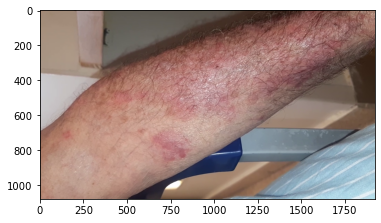

In [3]:
video = mmcv.VideoReader('psoriasis1.mp4')
raw_frames = [cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) for frame in video]
raw_frames=raw_frames[50:320]
plt.imshow(raw_frames[3])

In [4]:
N=len(raw_frames)
T=1/video.fps
Fs=video.fps
time=np.arange(0,N)/Fs
fouer_x=np.linspace(0.0, 1.0/(2.0*T), N//2)
blur=False
blur_kernel=(15,15)
show_for="roi"
heart_beat=1

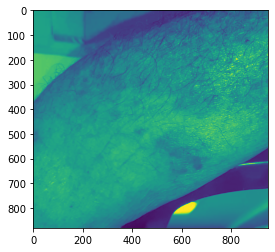

In [9]:
mean_rgb = np.empty((0, 3))
ROI_frames=[]
for frame in raw_frames:
    ROI=frame[200:1200,150:1100]
    ROI_frames.append(ROI)
    r,g,b=rgb_mean(ROI, ROI.shape[0]*ROI.shape[1])
    mean_rgb = np.append(mean_rgb, np.array([[r, g, b]]), axis=0)

green=[frame[:,:,1] for frame in ROI_frames]

if blur:
    frames=blur_frames(green,blur_kernel)
else:
    frames=green
    
plt.imshow(frames[3])

## CREATE REFERNECE FUNCTION

In [10]:
if show_for=="pixel":
    sig=get_signal_from_frames([700,700],frames)
else:
    sig=mean_rgb[:,1]

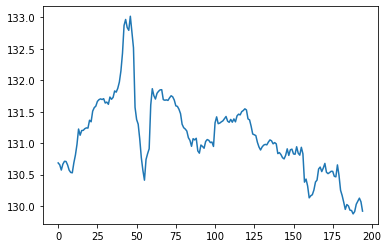

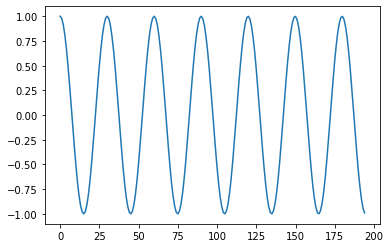

/home/boston/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


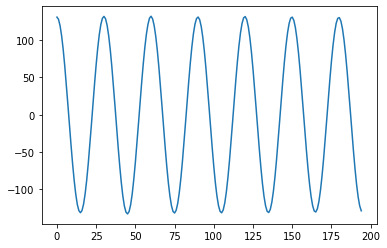

In [11]:
length=N/Fs
n=np.arange(0,length,1/Fs)
y=np.exp(2*1j*np.pi*heart_beat*n)
mul=np.multiply(y,sig)


plt.plot(sig)
plt.show()

plt.plot(y.real)
plt.show()

plt.plot(mul)
plt.show()


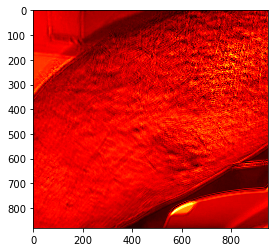

In [12]:
heatmap=[None]*len(frames)
for i, frame in enumerate(frames):
    heatmap[i]=frame*y[i]

maps=sum(heatmap)
a=np.abs(maps)
plt.imshow(a,cmap='hot', interpolation='nearest')